In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pickle
%matplotlib widget

In [4]:
flat_list = np.genfromtxt('../group08_HAT-P-12_20230214/flat/flat_list.txt', dtype=str)
print(flat_list)

['AF824326.fits' 'AF824327.fits' 'AF824328.fits' 'AF824329.fits'
 'AF824330.fits' 'AF824331.fits' 'AF824332.fits' 'AF824333.fits'
 'AF824334.fits' 'AF824335.fits' 'AF824336.fits' 'AF824337.fits'
 'AF824338.fits' 'AF824339.fits' 'AF824340.fits' 'AF824341.fits'
 'AF824342.fits' 'AF824343.fits' 'AF824344.fits' 'AF824345.fits'
 'AF824346.fits' 'AF824347.fits' 'AF824348.fits' 'AF824349.fits'
 'AF824350.fits' 'AF824351.fits' 'AF824352.fits' 'AF824353.fits'
 'AF824354.fits' 'AF824355.fits']


In [5]:
n_flat = len(flat_list)

In [6]:
median_bias = pickle.load(open('../Results/median_bias.p', 'rb'))
median_bias_error = pickle.load(open('../Results/median_bias_error.p', 'rb'))

#we'll need:
#RON
#gain

In [7]:
flat00_fits = fits.open('../group08_HAT-P-12_20230214/flat/' + flat_list[0])
flat00_fits[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  521 / length of data axis 1                          
NAXIS2  =                  156 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
DATE    = '2023-02-15T05:19:11' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
FILENAME= 'AF824326.fits'      / Original file name                             
TIMESYS = 'UTC     '        

In [8]:
flat00_gain = flat00_fits[0].header['GAIN']
flat00_ron = flat00_fits[0].header['RDNOISE']
flat00_data = flat00_fits[0].data * flat00_gain

In [9]:
print('Gain =', f'{flat00_gain:.2f}')
print(flat00_ron)
print(flat00_data)

Gain = 1.91
7.1
[[3077.01 3021.62 3050.27 ... 2828.71 2807.7  2807.7 ]
 [2786.69 2771.41 2784.78 ... 2817.25 2805.79 2800.06]
 [2792.42 2782.87 2779.05 ... 2811.52 2815.34 2809.61]
 ...
 [2767.59 2773.32 2780.96 ... 2813.43 2805.79 2805.79]
 [2773.32 2777.14 2763.77 ... 2819.16 2794.33 2796.24]
 [2777.14 2750.4  2771.41 ... 2819.16 2788.6  2800.06]]


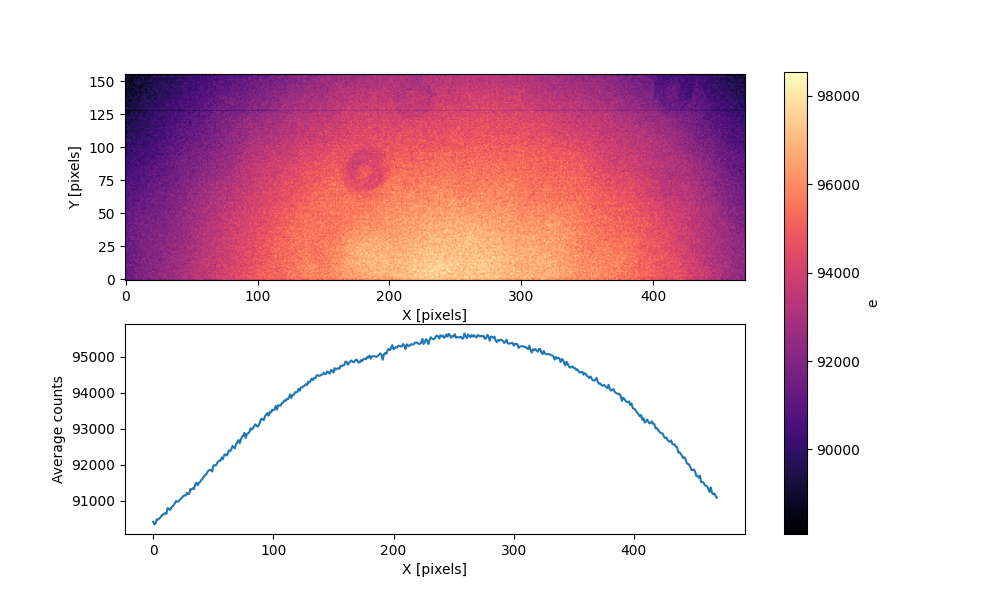

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
im1 = ax[0].imshow(flat00_data[:, 20:490], origin='lower', cmap='magma')   #the indexing is to exclude the black columns in the CCD
median_column = np.average(flat00_data[:, 20:490], axis=0)
im2 = ax[1].plot(median_column)
cbar = fig.colorbar(im1, ax=ax)

cbar.set_label('e')
ax[0].set_xlabel('X [pixels]')
ax[0].set_ylabel('Y [pixels]')
ax[1].set_xlabel('X [pixels]')
ax[1].set_ylabel('Average counts')
plt.show()

### 30/10

In [11]:
vmin = np.amin(flat00_data[:, 13:-13])
vmax = np.amax(flat00_data[:, 13:-13])
print(vmin, vmax)

87800.79 98542.62999999999


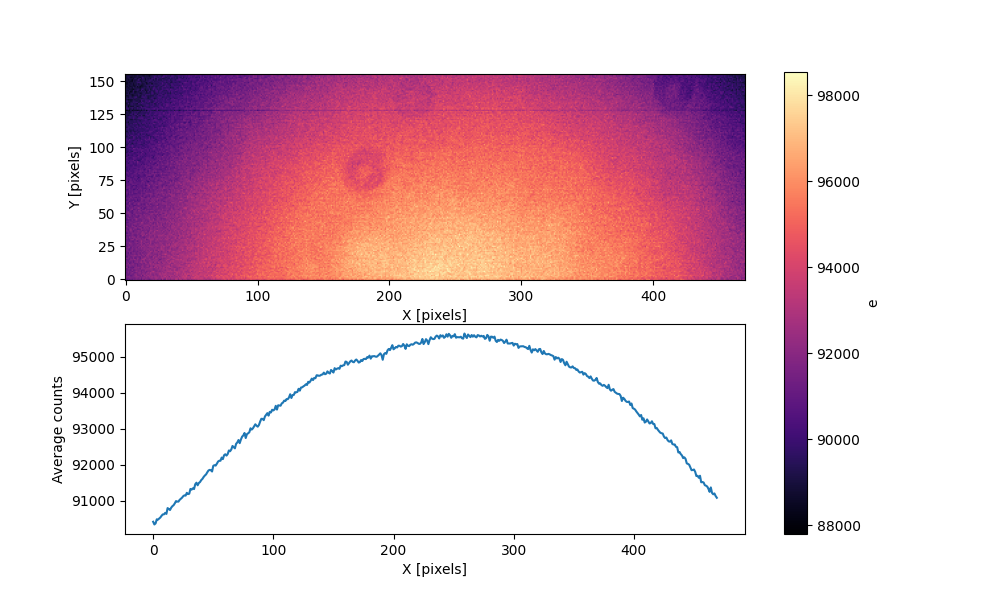

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
im1 = ax[0].imshow(flat00_data[:, 20:490], vmin = vmin, vmax = vmax, origin='lower', cmap='magma')   #the indexing is to exclude the black columns in the CCD
median_column = np.average(flat00_data[:, 20:490], axis=0)
im2 = ax[1].plot(median_column)
cbar = fig.colorbar(im1, ax=ax)

cbar.set_label('e')
ax[0].set_xlabel('X [pixels]')
ax[0].set_ylabel('Y [pixels]')
ax[1].set_xlabel('X [pixels]')
ax[1].set_ylabel('Average counts')
plt.show()

The "donuts" are caused by dust out of focus and create the shape of the telescope pupil on the CCD.

In [13]:
flat00_dim00, flat00_dim01 = np.shape(flat00_data)
print(n_flat, flat00_dim00, flat00_dim01)

30 156 521


The science frame filter must have the same filter of the flat-field (FF). Therefore, the flat-field is taken right before the science frame also to maintain the same "configuration" for the two exposures.

In [14]:
stack = np.empty([n_flat, flat00_dim00, flat00_dim01])

In [15]:
for i_flat, flat_name in enumerate(flat_list):
    flat_temp = fits.open('../group08_HAT-P-12_20230214/flat/' + flat_name)
    stack[i_flat, :, :] = flat_temp[0].data * flat_temp[0].header['GAIN'] - median_bias #we remove the bias to know the real value of the photons reaching the CCD
    flat_temp.close()


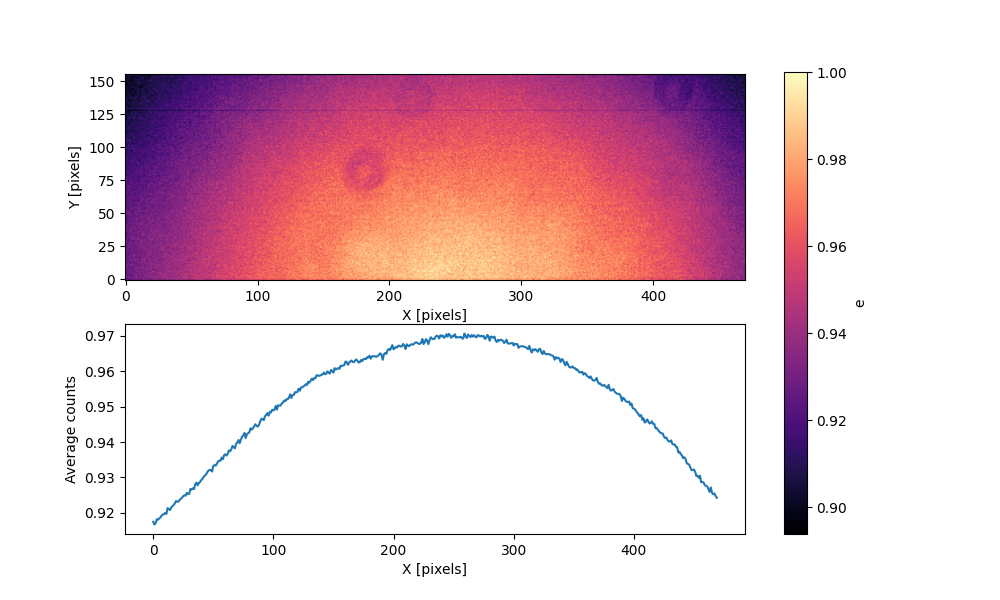

In [24]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
im1 = ax[0].imshow(flat00_data[:, 20:490]/vmax, origin='lower', cmap='magma')   #the indexing is to exclude the black columns in the CCD
median_column = np.average(flat00_data[:, 20:490]/vmax, axis=0)
im2 = ax[1].plot(median_column)
cbar = fig.colorbar(im1, ax=ax)

cbar.set_label('e')
ax[0].set_xlabel('X [pixels]')
ax[0].set_ylabel('Y [pixels]')
ax[1].set_xlabel('X [pixels]')
ax[1].set_ylabel('Average counts')  #normalized electrons
plt.show()

Normalizing by dividing for the maximum value is not the best approach because there could be a cosmic ray (CR) and therefore the FF is normalized to the flux of the CR. We then select a 50x50 pixels region of the FF and evaluate the median since it is less sensitive to outliers.

In [25]:
window_size = 50

x0 = np.int16(flat00_dim01/2 - window_size/2)
x1 = np.int16(flat00_dim01/2 + window_size/2)

y0 = np.int16(flat00_dim00/2 - window_size/2)
y1 = np.int16(flat00_dim00/2 + window_size/2)

flat_selection_median = np.median(flat00_data[y0:y1, x0:x1])
print('Median value: ', flat_selection_median)
print('Maximum value: ', vmax)

Median value:  95579.265
Maximum value:  98542.62999999999


In [27]:
normalization_factor = np.zeros(n_flat)

for i_flat in range(0, n_flat):
    normalization_factor[i_flat] = np.median(stack[i_flat, y0:y1, x0:x1])

print(normalization_factor)

[92801.17   93582.36   92833.64   93566.125  92920.545  93547.98
 92919.1125 93574.72   92844.145  93566.6025 92837.46   93494.5
 92926.7525 93503.5725 92783.025  93338.835  92789.71   93491.635
 92857.9925 93456.7775 92830.775  93543.6825 92858.9475 93560.395
 92944.42   93555.62   92921.5    93533.655  92915.77   93632.4975]


In a more efficient way, rather than doing a cycle, we can use the axis argument of the np.median command.

In [28]:
normalization_factor_axis = np.median(stack[:,  y0:y1, x0:x1], axis=(1, 2))
print(normalization_factor_axis)

[92801.17   93582.36   92833.64   93566.125  92920.545  93547.98
 92919.1125 93574.72   92844.145  93566.6025 92837.46   93494.5
 92926.7525 93503.5725 92783.025  93338.835  92789.71   93491.635
 92857.9925 93456.7775 92830.775  93543.6825 92858.9475 93560.395
 92944.42   93555.62   92921.5    93533.655  92915.77   93632.4975]


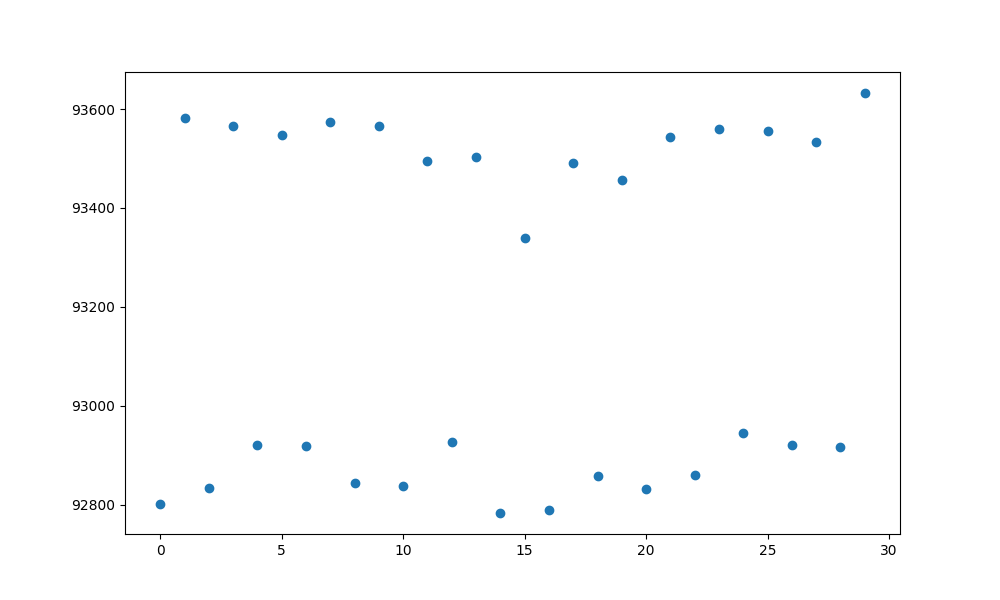

In [37]:
x_axis = np.arange(0, 30, 1)
plt.figure(figsize=(10, 6))
plt.scatter(x_axis, normalization_factor_axis)
plt.show()

The jumps are due to variability of the lamp used for the FF. That's why we first evaluate the median before normalizing the frames.

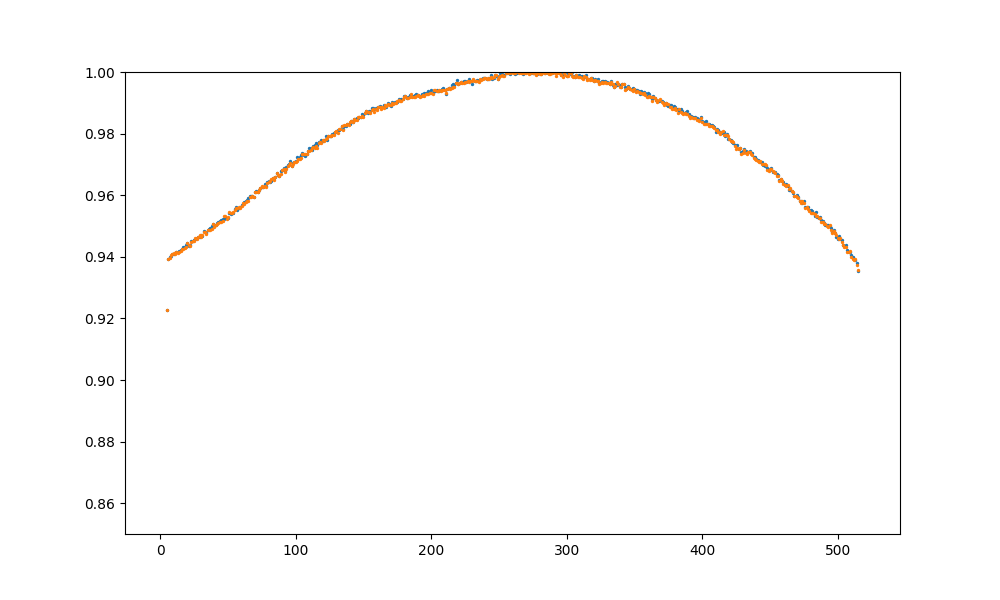

In [53]:
x_axis = np.arange(0, 521, 1)
plt.figure(figsize=(10, 6))

plt.scatter(x_axis, np.average(stack[0, :, :]/normalization_factor_axis[0], axis=(0)), s=2)
plt.scatter(x_axis, np.average(stack[1, :, :]/normalization_factor_axis[1], axis=(0)), s=2)

plt.ylim(0.85, 1.0)
plt.show()

In [41]:
stack_normalized_iter = np.zeros_like(stack)

for i_flat in range(0, n_flat):
    stack_normalized_iter[i_flat, :, :] = stack[i_flat, :, :]/normalization_factor_axis[i_flat]

print(stack_normalized_iter)


[[[ 3.24160784e-03  2.70648527e-03  2.97404656e-03 ...  5.76285838e-04
    3.70469467e-04  3.39597012e-04]
  [ 1.02908185e-04  0.00000000e+00  1.23489822e-04 ...  4.52796015e-04
    3.29306193e-04  2.57270463e-04]
  [ 2.05816371e-04  1.44071459e-04  9.26173668e-05 ...  3.70469467e-04
    3.91051104e-04  3.49887830e-04]
  ...
  [-6.17449112e-05  4.11632741e-05  8.23265483e-05 ...  4.01341923e-04
    3.49887830e-04  3.08724556e-04]
  [-2.05816371e-05  1.33780641e-04 -7.20357297e-05 ...  4.73377652e-04
    2.05816371e-04  2.36688826e-04]
  [ 1.02908185e-05 -1.95525552e-04  2.05816371e-05 ...  4.52796015e-04
    1.23489822e-04  2.67561282e-04]]

 [[ 2.88799086e-03  2.64307290e-03  2.58184342e-03 ...  6.53114540e-04
    2.85737611e-04  2.95942526e-04]
  [ 2.24508123e-04  2.65327782e-04  0.00000000e+00 ...  4.69426076e-04
    2.65327782e-04  3.16352355e-04]
  [ 1.02049147e-04  6.12294881e-05  5.10245734e-05 ...  5.91885052e-04
    3.67376929e-04  3.67376929e-04]
  ...
  [-1.63278635e-04  0.0

Alternatively

In [65]:
stack_normalized = (stack.T / normalization_factor_axis).T

However, the first method is the safest.

In [66]:
median_flat = np.median(stack_normalized, axis = 0)

print(np.shape(median_flat))
print(np.shape(flat00_data))

(156, 521)
(156, 521)
